**Logistic Regression:** Logistic regression is a supervised learning where input or independent variables and output or dependent variables should be present in the dataset.

1. In Logistic regression the target variable should consists of categorical values or binary values.
2. If target has binary classes than it is a binomial Logistic regression.
3. If target has multiclass or more than one class than it is a  multinomial Logistic regression.
4. if target has ordinal values or ordered classes (low,medium,high) than it is ordinal logistic regression.
5. Logistic regression is used to solve the classification problem.
6. In Logistic regression as we make probabilities based prediction, 'S' shape curve is fitted with a threshold value between the range of the 0 or 1
7. In linear regression we try to fit a best line, but in logistic regression we try to fit a 'S' shaped curve with a threshold value. We call it as sigmoid function or a logistic function

                y' = 1/(1+e^-z)
                z=b0+b1*x1+....bn*xn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
Log_dataset= pd.read_csv("/content/framingham.csv")

In [ ]:
Log_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
Log_dataset.shape

(4238, 16)

**input/independent variables-** ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

**output/dependent variable-** ['TenYearCHD']

In [ ]:
Log_dataset.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


coulmns -  glucose,sysBp,diaBp,currentSomker correlation values is >50% positively correlated to each other. so dropping the values from the data set. There is a multi collinearity between the independent variables.

In [ ]:
Log_dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
new_log_datase=Log_dataset.drop(['currentSmoker','sysBP','diaBP','glucose'],axis=1)

In [ ]:
new_log_datase.shape

(4238, 12)

In [ ]:
new_log_datase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   BMI              4219 non-null   float64
 10  heartRate        4237 non-null   float64
 11  TenYearCHD       4238 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 397.4 KB


In [ ]:
new_log_datase=new_log_datase.dropna()

In [ ]:
# splitting the dataset into features and target variables
Log_features= new_log_datase.drop('TenYearCHD',axis=1)
Log_target=new_log_datase['TenYearCHD']

In [ ]:
# scaling the data by removing the mean or centering the mean and making standard deviation to unit value
scaler=StandardScaler()
Log_features=scaler.fit_transform(Log_features)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Log_features,Log_target,test_size=0.25)

In [ ]:
y_train.shape

(2990,)

In [ ]:
Log_model=LogisticRegression()
Log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
Log_model.score(X_test,y_test)

0.8415245737211635

In [ ]:
Log_model.score(X_train,y_train)

0.8568561872909699

In [ ]:
Log_predict=Log_model.predict(X_test)

In [ ]:
print(classification_report(Log_predict,y_test,target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       1.00      0.84      0.91       989
      class1       0.04      0.75      0.07         8

    accuracy                           0.84       997
   macro avg       0.52      0.80      0.49       997
weighted avg       0.99      0.84      0.91       997



In [ ]:
cm=confusion_matrix(Log_predict,y_test)

In [ ]:
print('confusion matrix:')
print('',confusion_matrix(Log_predict,y_test))
print('\033[1m Confusion matrix for binary classification \033[0;0m')
print('  ',np.array(['10 years risk','No risk']))
print(np.matrix([['True Positive','False Positive]','[10 years risk]'],['Flase Negative', 'True Negative]','[No risk]']]),end=' ')
#print(np.matrix([['10 years risk'],['No risk']]))

confusion matrix:
 [[833 156]
 [  2   6]]
 Confusion matrix for binary classification 
   ['10 years risk' 'No risk']
[['True Positive' 'False Positive]' '[10 years risk]']
 ['Flase Negative' 'True Negative]' '[No risk]']] 

**Type 1 error- false positives**

**Type 2 error-false negatives**

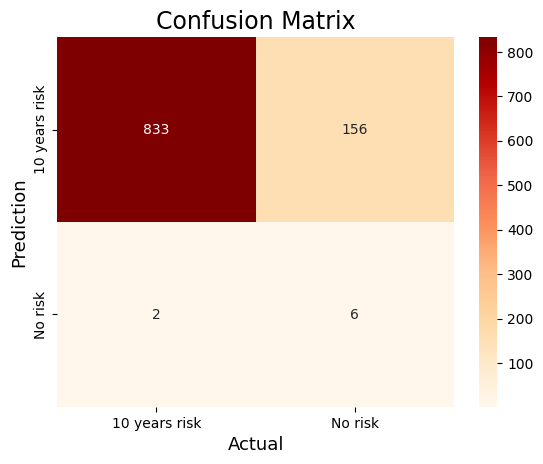

In [ ]:
sns.heatmap(cm,annot=True,fmt='g',cmap='OrRd',xticklabels=['10 years risk','No risk'],yticklabels=['10 years risk','No risk'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Recall:** How often the model predicted postive events correctly

                   Recall = TP/TP+FN

**Precision** How often the model predicted the event to be positive and it turned out to be true.

                  Precision = TP/TP+FP

**Accuracy** How often the model predicted correctly. The ratio of the true cases to all the cases.

                 Accuracy = TP +TN/(TP+TN+FP+FN)


**f1 score**


                f1 score = 2*((precision*Recall)/(precision+Recall))

In [ ]:
print("Recall = ",end=' ')
Recall= 833/(833+2)
print(round(Recall*100,2))

Recall =  99.76


In [ ]:
print("Precision = ",end=' ')
precision=833/(833+156)
print(round(precision*100,2))

Precision =  84.23


In [ ]:
print("Accuracy = ",end=' ')
accuracy=(833+6)/(833+156+2+6)
print(round(accuracy*100,2))

Accuracy =  84.15


In [ ]:
print("f1 score =",end=' ')
f1score =2*((precision*Recall)/(precision+Recall))
print(round(f1score*100,2))

f1 score = 91.34


**ROC: Receiver Operating Characteristics**

A graph that shows how well a classification model performs. It is a probability curve that plots the TPR against FPR at various threshold values

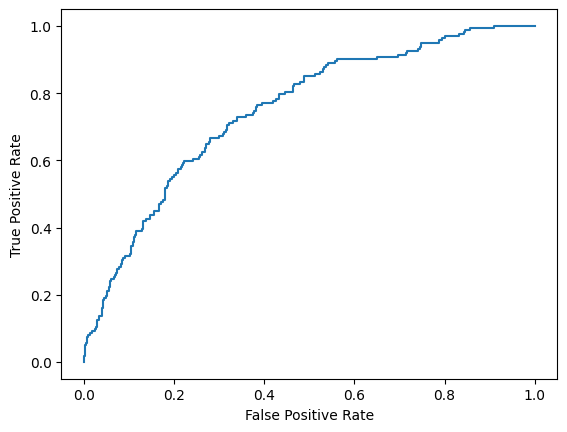

In [ ]:
from sklearn import metrics
y_pred_proba = Log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Area Under Curve:**
The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

**Note:**The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.

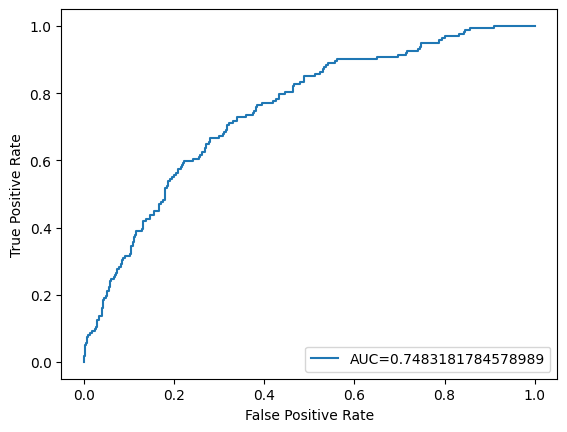

In [ ]:
y_pred_proba = Log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()